## Outlier detection and removal using z-score and standard deviation

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [8]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [9]:
# from matplotlib.pyplot import figure
# figure(figsize=(10, 6), dpi=80)

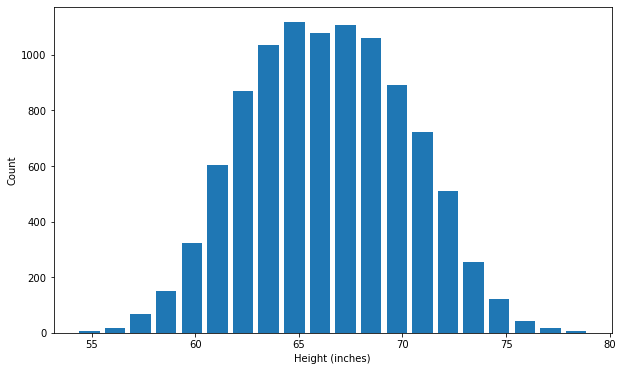

In [10]:
plt.hist(df['height'], bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Read this article to clear your fundamentals on normal distribution, bell curve and standard deviation: https://www.mathsisfun.com/data/standard-normal-distribution.html

**Plot bell cureve along with histogram for our dataset**

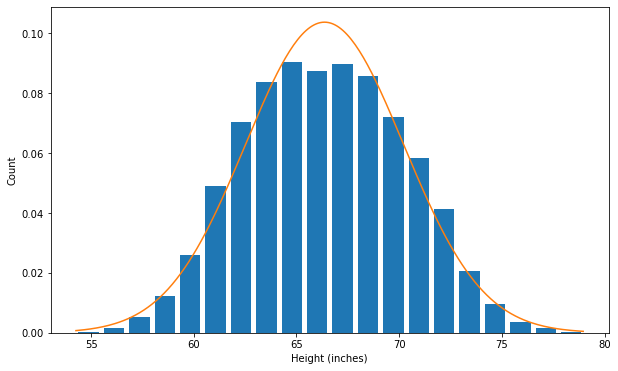

In [11]:
from scipy.stats import norm

plt.hist(df['height'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df['height'].min(), df['height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['height'].mean(), df['height'].std()))

In [14]:
df['height'].mean()
# df.height.mean()

66.3675597548656

In [15]:
df['height'].std()
# df.height.std()

3.847528120795573

### (1) Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [16]:
upper_limit = df['height'].mean() + 3*df['height'].std()
upper_limit

77.91014411725232

In [18]:
lower_limit = df['height'].mean() - 3*df['height'].std()
lower_limit

54.824975392478876

Here are the outliers that are beyond 3 std dev from mean

In [20]:
df[(df['height'] > upper_limit) | (df['height'] < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is **78 inch** which is around **6ft 6 inch**. Now that is quite unsual height.There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers.

**Now remove these outliers and generate new dataframe**

In [21]:
df_no_outlier_std_dev = df[(df['height'] < upper_limit) & (df['height'] > lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [22]:
df_no_outlier_std_dev.shape

(9993, 2)

In [23]:
df.shape

(10000, 2)

Avode shows original dataframe had 10000 rows (data points). Out of that we removed 7 outliers (i.e 10000 - 9993)

### (2) Outlier detection and removal using Z score

**Z score is a way to achieve same thing that we did in part (1)**

**Z score indicated how many standard deviation away a data point is.**

For example, in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

**Calcaulate the Z score**

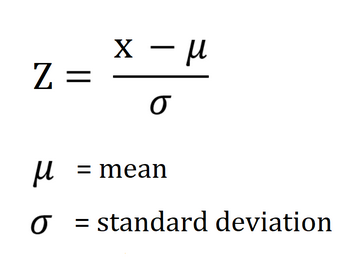

In [24]:
df['zscore'] = (df['height'] - df['height'].mean()) / df['height'].std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Abpve for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [25]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than +3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [26]:
df[df['zscore'] > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [27]:
df[df['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Here is the list of all outliers

In [28]:
df[(df['zscore'] < -3) | (df['zscore'] > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


**Remove the outliers and produce a new dataframe**

In [29]:
df_no_outliers = df[(df['zscore'] > -3) & (df['zscore'] < 3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [30]:
df_no_outliers.shape

(9993, 3)

In [31]:
df.shape

(10000, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

### Exercise

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following:

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

2. After removing outliers in step 1, you get a new dataframe.

3. On step(2) dataframe, use 4 standard deviation to remove outliers

4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result